# Weekly activities

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import display_image, display_images, auto_canny

1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?

In [5]:
# 3x3
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])
img = cv.imread("images/native-bee.png")
dst = cv.filter2D(img, -1, kernel)

display_images([img, dst], ("source", "sharpen 3x3"))

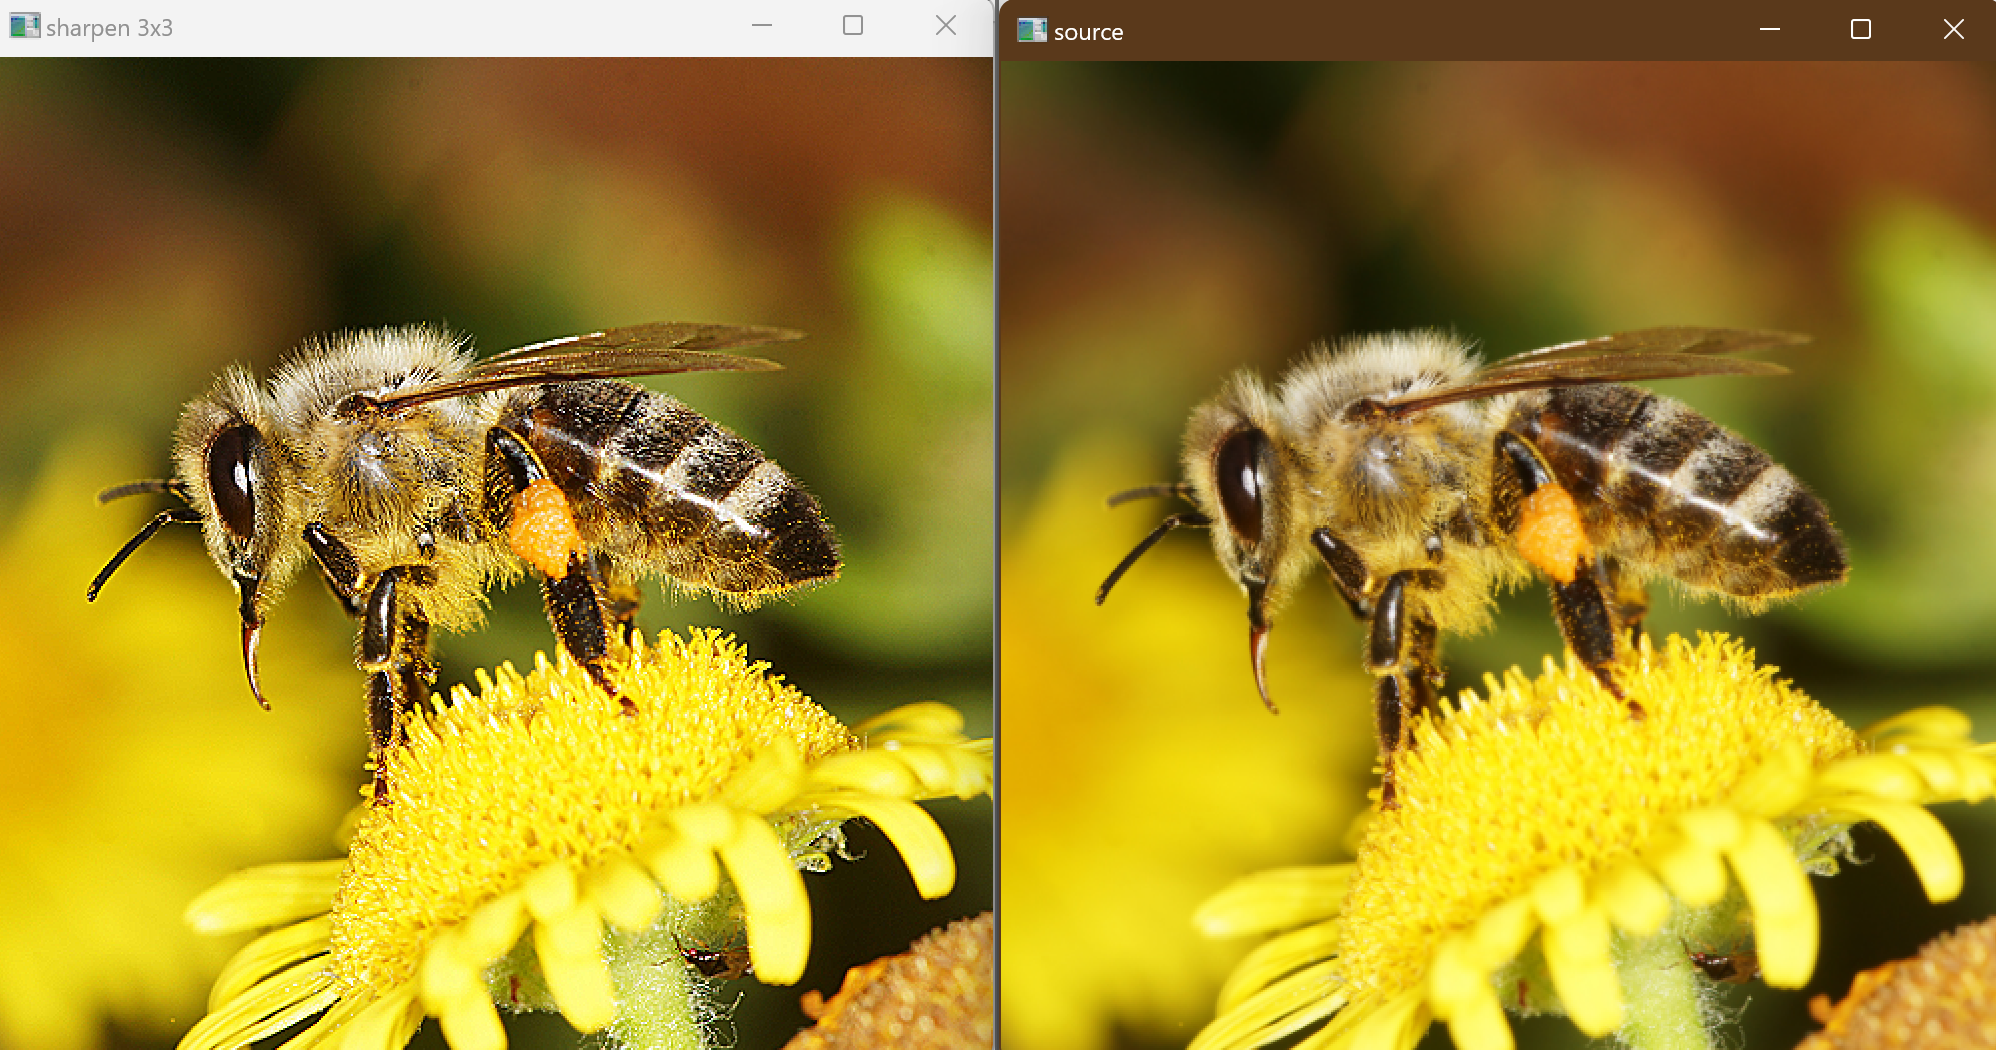

In [9]:
# 5x5
kernel = np.array([[-1, -1, -1, -1, -1],
                  [-1, -1, -1, -1, -1],
                  [-1, -1, 25, -1, -1],
                  [-1, -1, -1, -1, -1],
                  [-1, -1, -1, -1, -1]])
img = cv.imread("images/native-bee.png")
dst = cv.filter2D(img, -1, kernel)

display_images([img, dst], ("source", "sharpen 5x5"))

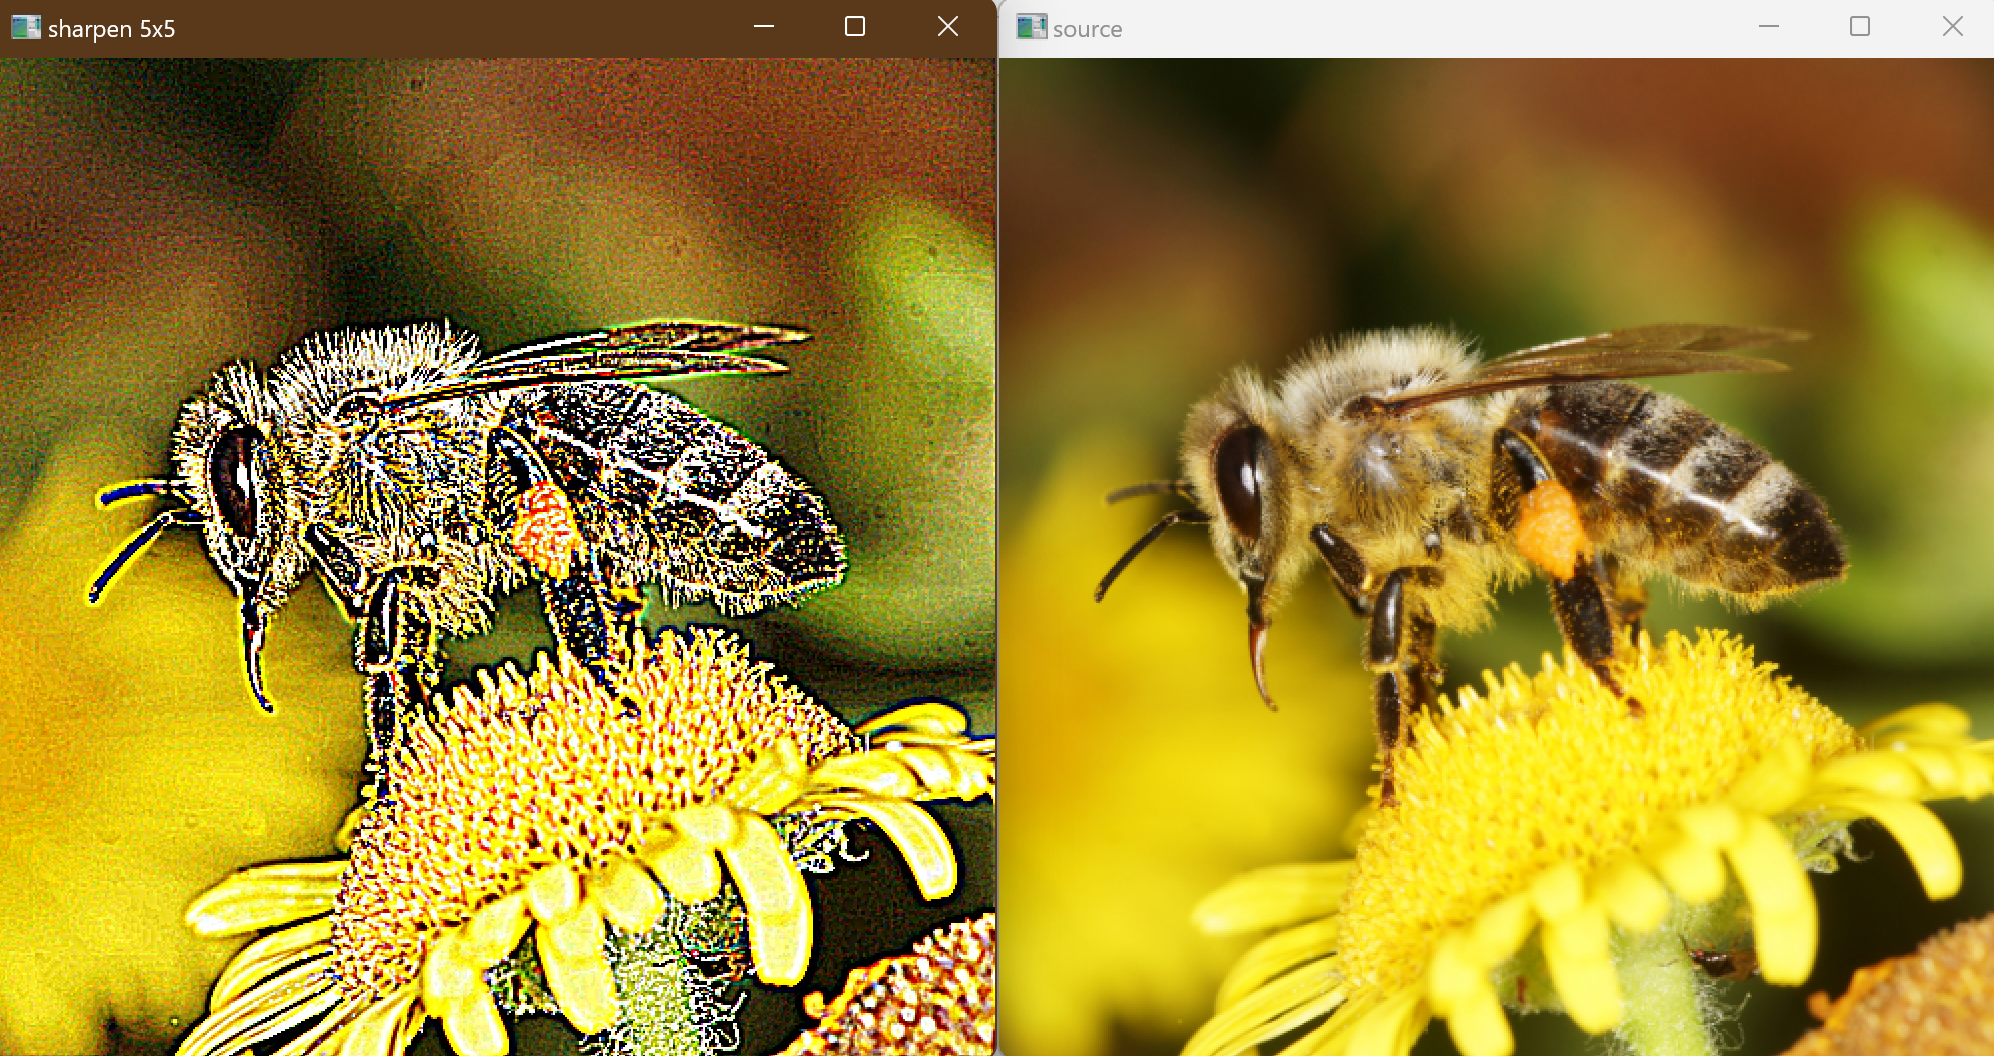

`Ans`: 3x3 kernel provide a balance sharpening effect. 5x5 kernel provide a strong sharpening effect

2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [5]:
# average filter

img = cv.imread("images/noise_lena.jpeg")
blur = cv.blur(img, (5, 5))

display_images([img, blur],  ("original", "blur"))

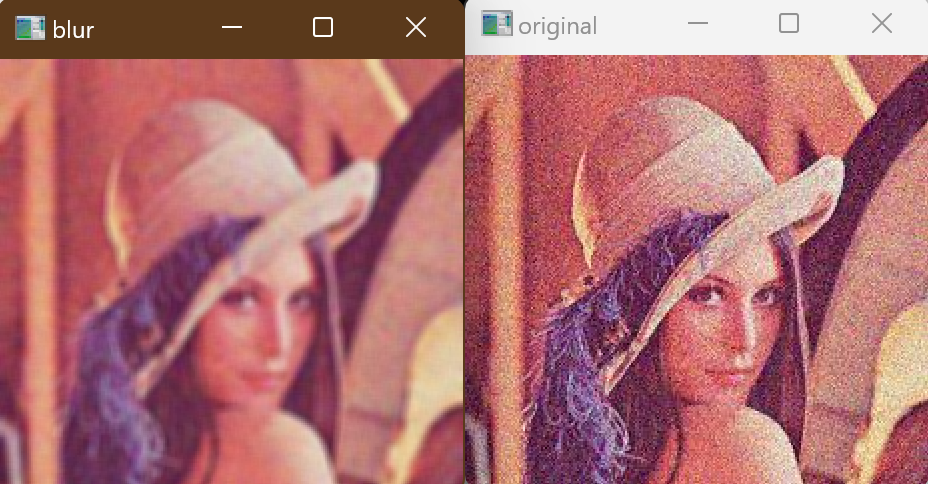

In [8]:
# gaussian blurring

img = cv.imread("images/noise_lena.jpeg")
blur = cv.GaussianBlur(img, (5, 5), 0)

display_images([img, blur],  ("original", "blur"))

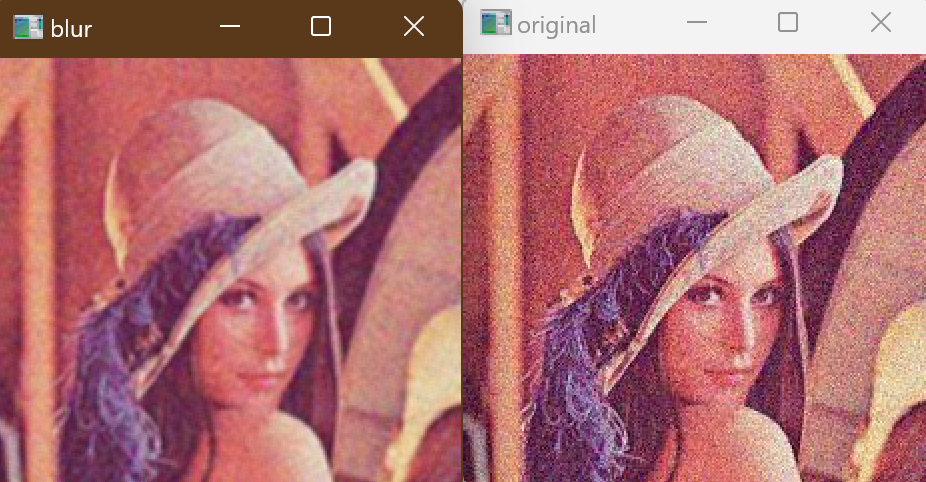

In [10]:
# median blurring

img = cv.imread("images/noise_lena.jpeg")
blur = cv.medianBlur(img, 5)

display_images([img, blur],  ("original", "blur"))

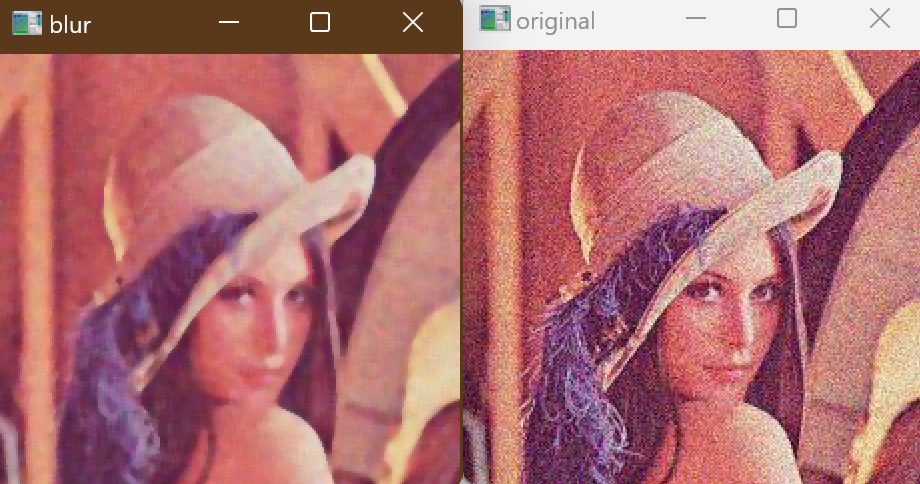

`Type of noise: ` Gaussian noise

3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

In [33]:
img = cv.imread("images/boat.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, th_otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

contours, _ = cv.findContours(th_otsu, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

contour_max_area = max(contours, key=cv.contourArea)

x, y, w, h = cv.boundingRect(contour_max_area)
img_copy = img.copy()
cv.rectangle(img_copy, (x,y), (x+w, y+h), (0, 255, 0), 2)
display_image("bounding box", img_copy)

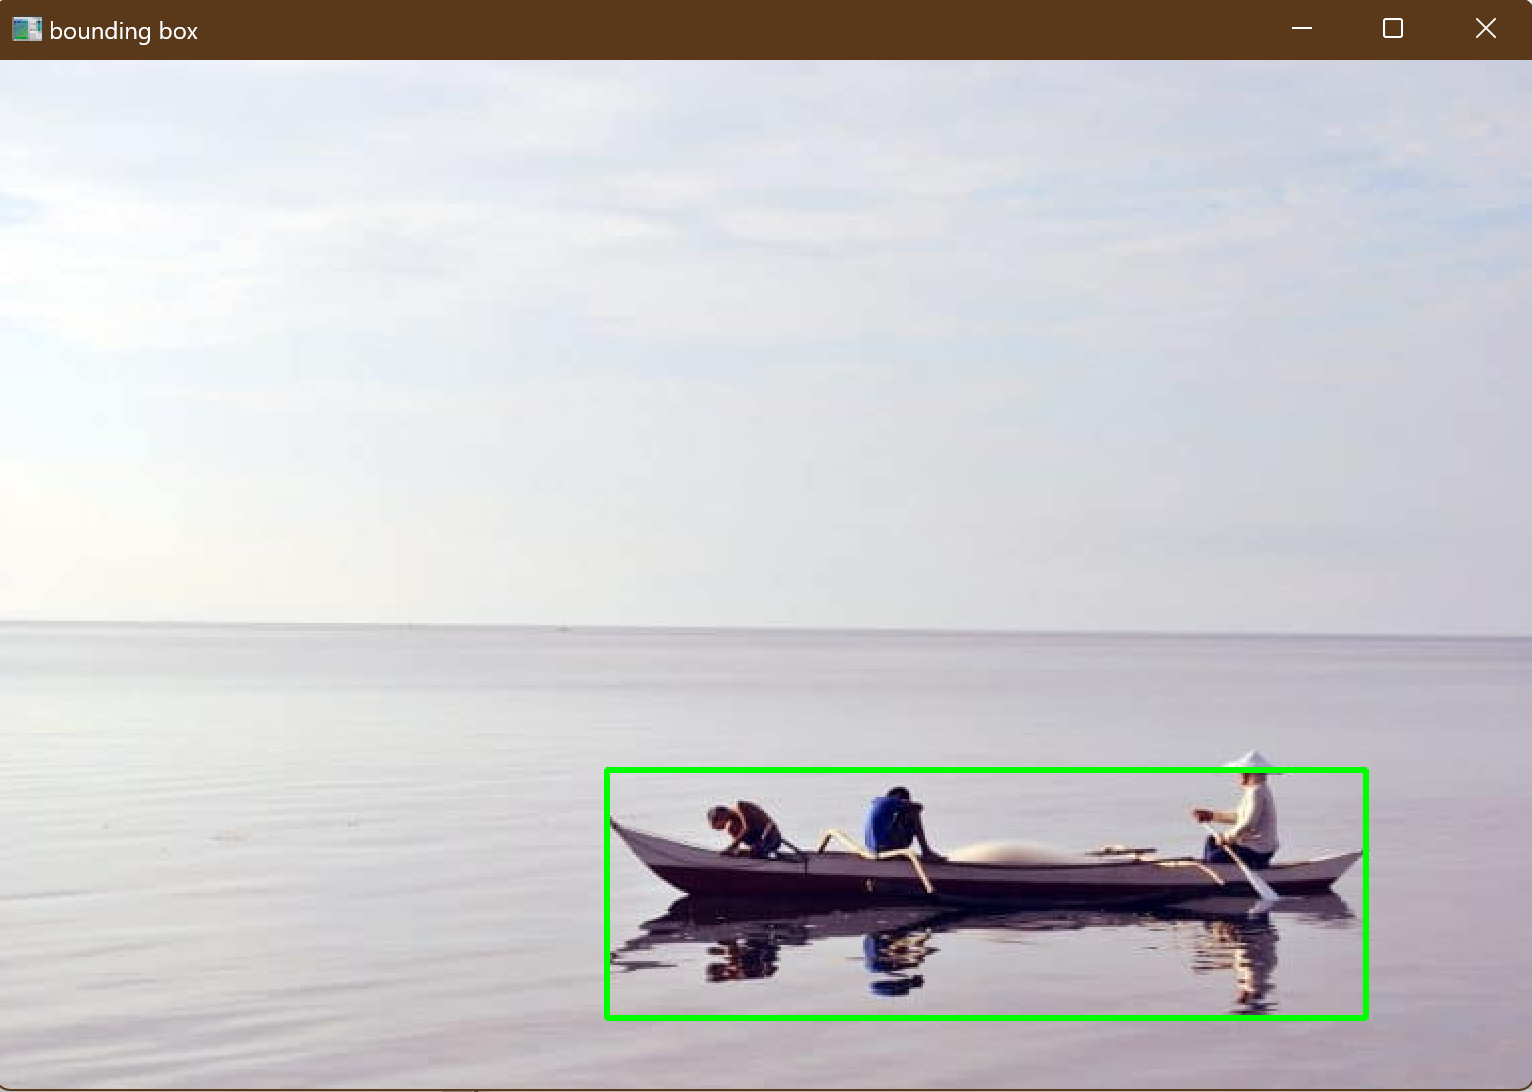